# Singapore Stock Closing Price Trends: 2023 vs 2024

Compare daily closing prices for six tech stocks between 2023 and 2024 using `yfinance`.

**Stocks:** DBS, OCBC, UOB, Singtel, Maplettree, Singapore Airlines

**Workflow:**
1. Import libraries (`yfinance`, `pandas`, `matplotlib`)
2. Download 2023 & 2024 closing prices
3. Plot 2023 (solid) vs 2024 (dashed)

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed

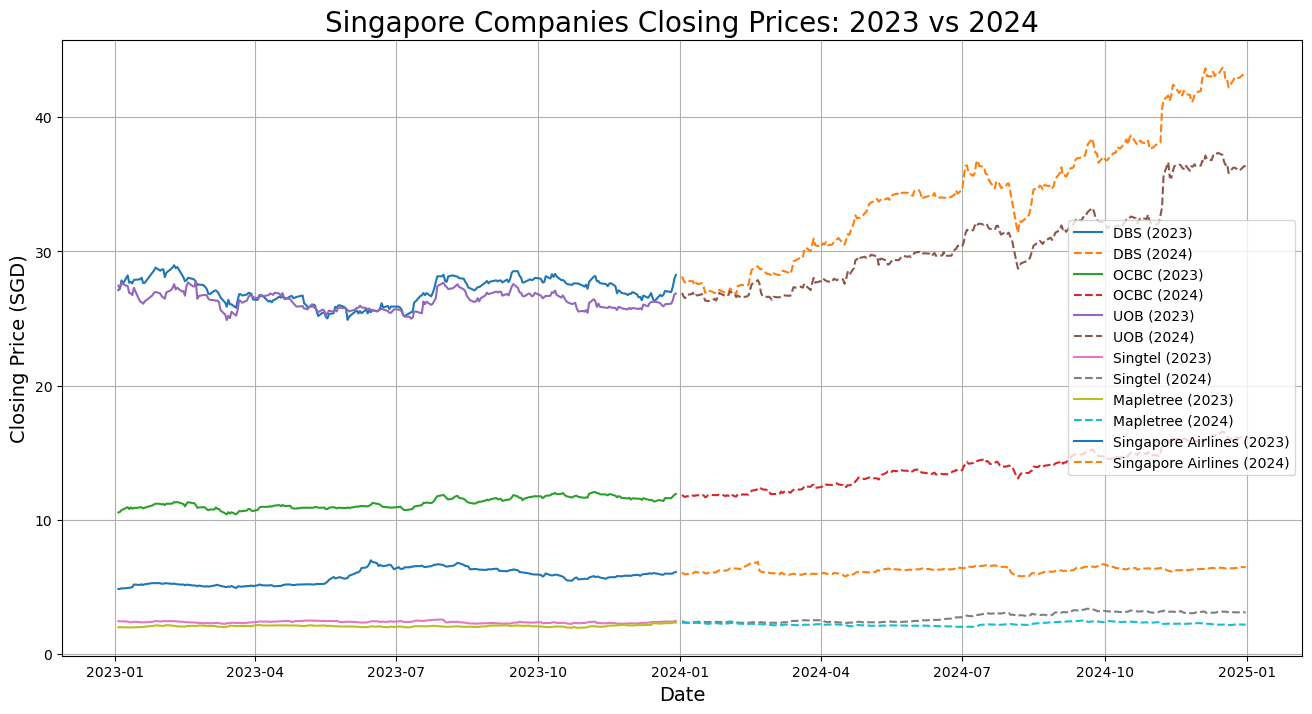

In [10]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define Singapore stock tickers
tickers = [
    'D05.SI',  # DBS Group Holdings Ltd
    'O39.SI',  # Oversea-Chinese Banking Corporation (OCBC)
    'U11.SI',  # United Overseas Bank Ltd (UOB)
    'Z74.SI',  # Singapore Telecommunications Limited (Singtel)
    'ME8U.SI', # Mapletree Industrial Trust
    'C6L.SI'   # Singapore Airlines Limited
]

# mapping
ticker_names = {
    'D05.SI': 'DBS',
    'O39.SI': 'OCBC',
    'U11.SI': 'UOB',
    'Z74.SI': 'Singtel',
    'ME8U.SI': 'Mapletree',
    'C6L.SI': 'Singapore Airlines'
}

# Define date ranges
start_2023 = '2023-01-01'
end_2024 = '2024-01-01'
start_2024 = '2024-01-01'
end_2025 = '2025-01-01'

# Download 2023 and 2024 data
data_2023 = yf.download(tickers, start=start_2023, end=end_2024)['Close']
data_2024 = yf.download(tickers, start=start_2024, end=end_2025)['Close']

# Plot 2023 and 2024 closing prices
plt.figure(figsize=(16,8))

for ticker in tickers:
    plt.plot(data_2023.index, data_2023[ticker], label=f'{ticker_names[ticker]} (2023)', linestyle='-')
    plt.plot(data_2024.index, data_2024[ticker], label=f'{ticker_names[ticker]} (2024)', linestyle='--')

plt.title('Singapore Companies Closing Prices: 2023 vs 2024', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price (SGD)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## Calculate Annual Returns

For each stock ticker, we compute year-over-year returns for 2023 and 2024 as:

- **2023 Return (%)** = (last close in 2023 − first close in 2023) / first close in 2023 × 100  
- **2024 Return (%)** = (last close in 2024 − first close in 2024) / first close in 2024 × 100  

The results will be stored in a DataFrame for easy comparison.

In [11]:
returns = {}

for ticker in tickers:
    start_price_2023 = data_2023[ticker].iloc[0]
    end_price_2023 = data_2023[ticker].iloc[-1]
    return_2023 = (end_price_2023 - start_price_2023) / start_price_2023 * 100

    start_price_2024 = data_2024[ticker].iloc[0]
    end_price_2024 = data_2024[ticker].iloc[-1]
    return_2024 = (end_price_2024 - start_price_2024) / start_price_2024 * 100

    returns[ticker_names[ticker]] = {
        '2023 Return (%)': return_2023,
        '2024 Return (%)': return_2024
    }

returns_df = pd.DataFrame(returns).T
returns_df = returns_df.round(2)

print(returns_df)

                    2023 Return (%)  2024 Return (%)
DBS                            4.15            53.24
OCBC                          13.14            37.35
UOB                           -2.09            35.01
Singtel                       -0.03            27.01
Mapletree                     17.85            -6.33
Singapore Airlines            26.07             5.82


## Plot Annual Returns Comparison

Generate a grouped bar chart to compare each stock’s 2023 vs 2024 returns:

- Use `returns_df.plot(kind='bar', figsize=(12,6))`  
- Add title, axis labels, grid and legend for clarity  
- Rotate x-ticks to improve readability

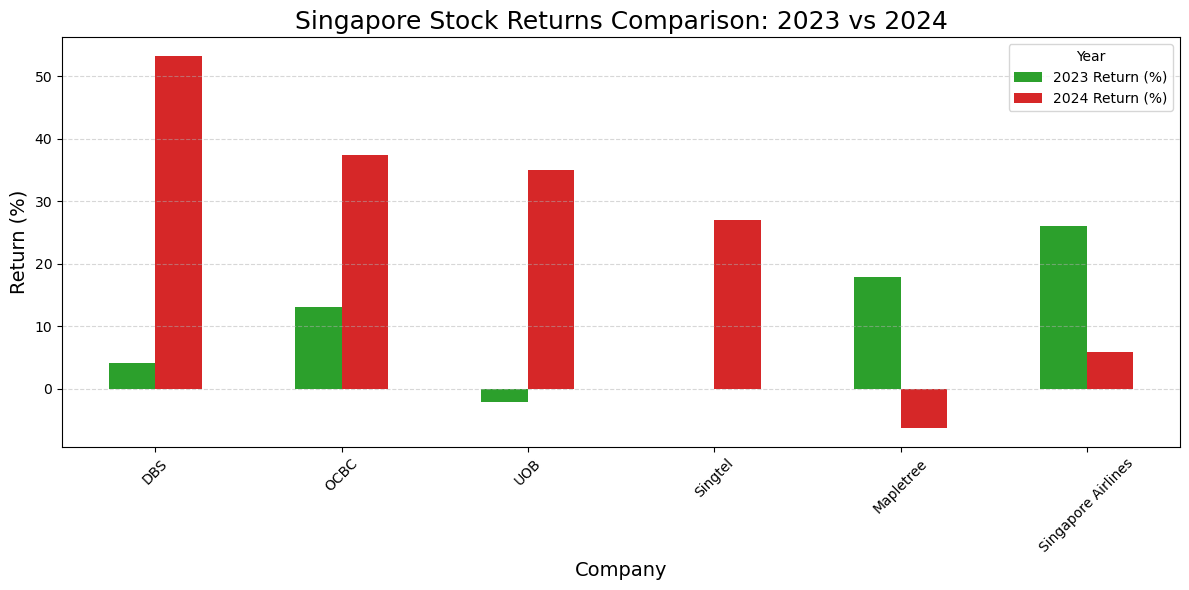

In [12]:

colors = ['#2ca02c', '#d62728'] 
returns_df.plot(kind='bar', figsize=(12,6), color=colors)

plt.title('Singapore Stock Returns Comparison: 2023 vs 2024', fontsize=18)
plt.ylabel('Return (%)', fontsize=14)
plt.xlabel('Company', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()